In [1]:
import numpy as np
import pandas as pd
import openturns as ot
from matplotlib import cm
import matplotlib.pyplot as plt
from bancs import *
import matplotlib as mpl
from matplotlib.colors import ListedColormap

In [2]:
from matplotlib import rc
rc('font', **{'family': 'Libertine'})
rc('text', usetex=True)
rc('text', usetex=True)
plt.rcParams.update({'text.latex.preamble': r'\usepackage{amsfonts}'})
plt.rcParams.update({'text.latex.preamble': r'\usepackage{amsmath}'})
plt.rcParams.update({'text.latex.preamble': r'\usepackage{bm}'})
rc('font', size=16)# Set the default text font size
rc('axes', titlesize=20)# Set the axes title font size
rc('axes', labelsize=16)# Set the axes labels font size
rc('xtick', labelsize=16)# Set the font size for x tick labels
rc('ytick', labelsize=16)# Set the font size for y tick labels
rc('legend', fontsize=16)# Set the legend font size

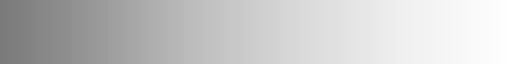

In [3]:
greys = mpl.colormaps['Greys_r']
faded_greys = ListedColormap(greys(np.linspace(0.4, 1, 128)))
faded_greys

In [4]:
g = ot.SymbolicFunction(["x1", "x2"], ["(x1 - x2) ^ 2 - 8 * (x1 + x2 - 5)"])
X = ot.ComposedDistribution([ot.Normal(0., 1.)] * 2)
Y = ot.CompositeRandomVector(g, ot.RandomVector(X))
threshold = 0.
failure_event = ot.ThresholdEvent(Y, ot.LessOrEqual(), threshold)
pf_ref = 0.0001315399999999369

## BANCS

Quantiles = [32.79889269 20.70945689 12.31462856  5.45885773  0.35098534 -3.47057768]
Proba EBC = 1.15e-04
Relative error = 12.63%


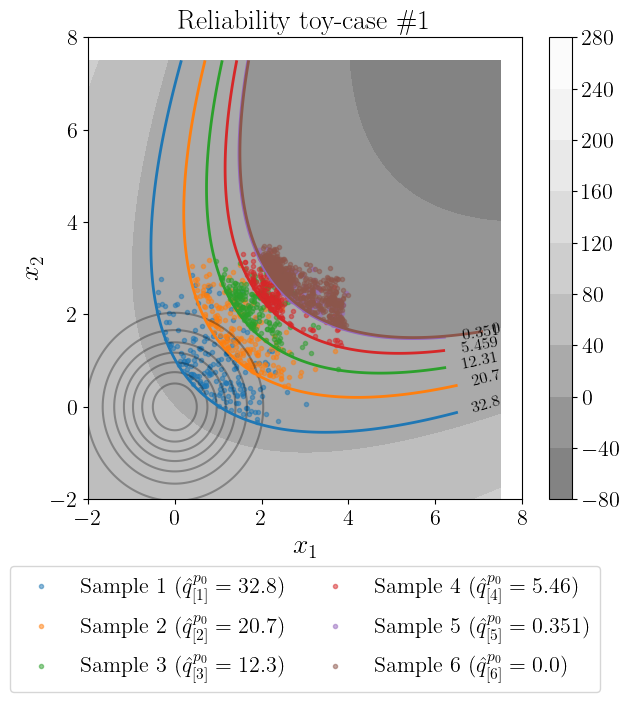

In [5]:
N = int(1e3)
bancs = BANCS(failure_event, N=N, M=12, p0=0.20)
quantiles = bancs.run()
pf = bancs.compute_pf()
df = bancs.df
print("Quantiles =", quantiles)
print("Proba EBC = {:.2e}".format(pf))
print("Relative error = {:.2%}".format(np.abs(pf - pf_ref) / pf_ref))
fig = bancs.draw_2D_BANCS(title="Reliability toy-case \#1", colorbar=faded_greys)
plt.xlim(-2, 8)
plt.ylim(-2, 8);

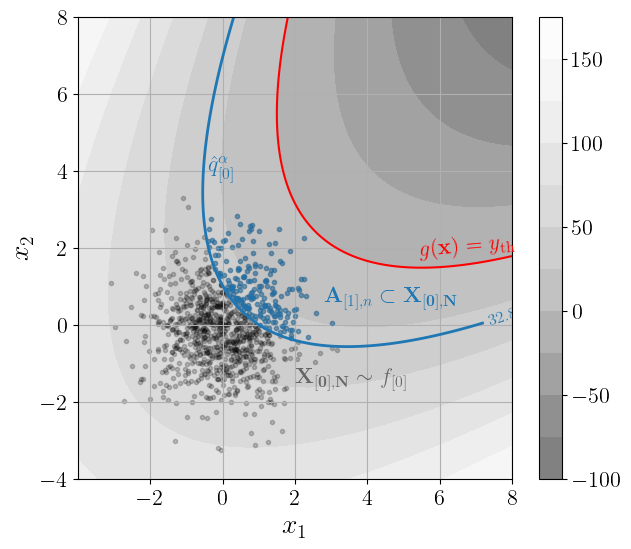

In [6]:
i = 0
d = DrawFunctions()
d.set_bounds([-4.] * 2, [8.] * 2)
d.draw_2D_controur(title="", function=g, distribution=None, colorbar=faded_greys, contour_values=False)
ssample = df[(df["Subset"]==i) & (df["Y"] <= quantiles[i])]
ssample_full = df[(df["Subset"]==i)]
sslabel = "Subset {} ($q_{{p_0}}^{} = {:.3}$)".format(i, i, quantiles[i])
# Scatter plots
plt.scatter(ssample_full["X0"].values, ssample_full["X1"].values, color='k', marker='.', alpha=0.2)
plt.scatter(ssample["X0"].values, ssample["X1"].values, color='C0', marker='.', alpha=0.4, zorder=3)
# Quantile contours
contour = plt.contour(d.X0, d.X1, d.Z, levels=[quantiles[i]], colors='C{}'.format(i), linewidths=2, linestyles=['solid'])
plt.clabel(contour, inline=True, fontsize=12, colors='C{}'.format(i))
contour = plt.contour(d.X0, d.X1, d.Z, levels=[threshold], colors='red')
# Texts
plt.text(2, -1.5, "$\\mathbf{X_{[0], N}} \sim f_{[0]}$", fontsize=16, color='k', alpha=0.5)
plt.text(2.8, 0.6, "$\\mathbf{A}_{[1], n} \\subset \\mathbf{X_{[0], N}}$", fontsize=16, color='C0')
plt.text(5.4, 1.8, "$g(\\mathbf{x}) = y_{\mathrm{th}}$", fontsize=16, color='red', rotation=5)
plt.text(-0.4, 4, "$\\hat{q}_{[0]}^\\alpha$", fontsize=16, color='C0')
# Options
plt.xticks(range(-2, 10, 2))
plt.yticks(range(-4, 10, 2))
plt.grid()

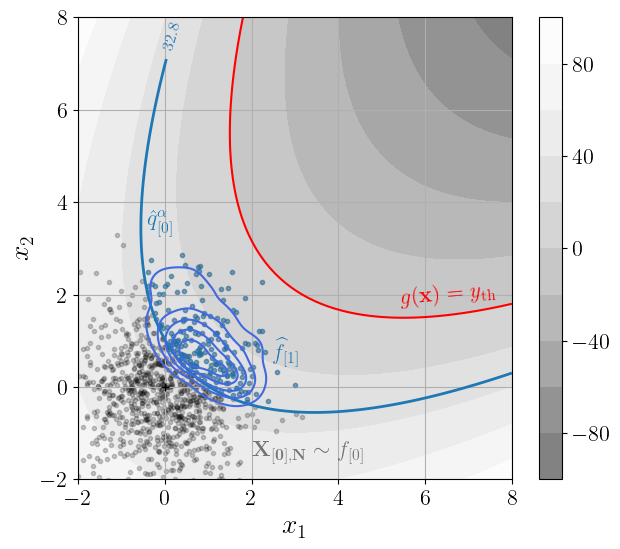

In [7]:
i = 0
d = DrawFunctions()
d.set_bounds([-2.] * 2, [8.] * 2)
d.draw_2D_controur(title="", function=g, distribution=None, colorbar=faded_greys, contour_values=False)
ssample = df[(df["Subset"]==i) & (df["Y"] <= quantiles[i])]
ssample_full = df[(df["Subset"]==i)]
sslabel = "Subset {} ($q_{{p_0}}^{} = {:.3}$)".format(i, i, quantiles[i])
# Scatter plots
plt.scatter(ssample_full["X0"].values, ssample_full["X1"].values, color='k', marker='.', alpha=0.2)
plt.scatter(ssample["X0"].values, ssample["X1"].values, color='C0', marker='.', alpha=0.4, zorder=3)
# Quantile contours
contour = plt.contour(d.X0, d.X1, d.Z, levels=[quantiles[i]], colors='C{}'.format(i), linewidths=2, linestyles=['solid'])
plt.clabel(contour, inline=True, fontsize=12, colors='C{}'.format(i))
contour = plt.contour(d.X0, d.X1, d.Z, levels=[threshold], colors='red')
# Conditional distribution contours
d.set_bounds([-1] * 2, [3] * 2)
Xcond = bancs.conditional_distributions[i+1]
Zpdf = np.array(Xcond.computePDF(d.nodes)).reshape(d.grid_size, d.grid_size)
plt.contour(d.X0, d.X1, Zpdf, 6, corner_mask=False, colors='royalblue', zorder=3)
plt.plot(0, 0, marker='+', color='k')
# Texts
plt.text(2, -1.5, "$\\mathbf{X_{[0], N}} \sim f_{[0]}$", fontsize=16, color='k', alpha=0.5)
#plt.text(2.8, 0.6, "$\\mathbf{A}_{[1], n} \\subset \\mathbf{X_{[0], N}}$", fontsize=16, color='C0')
plt.text(2.5, 0.6, "$\\widehat{f}_{[1]}$", fontsize=16, color='C0')
plt.text(5.4, 1.8, "$g(\\mathbf{x}) = y_{\mathrm{th}}$", fontsize=16, color='red', rotation=5)
plt.text(-0.4, 3.5, "$\\hat{q}_{[0]}^\\alpha$", fontsize=16, color='C0')
# Options
plt.xticks(range(-2, 10, 2))
plt.yticks(range(-4, 10, 2))
plt.xlim(-2, 8)
plt.ylim(-2, 8)
plt.grid()
plt.savefig("figures/bancs_illustration0.jpg", bbox_inches='tight', dpi=300);

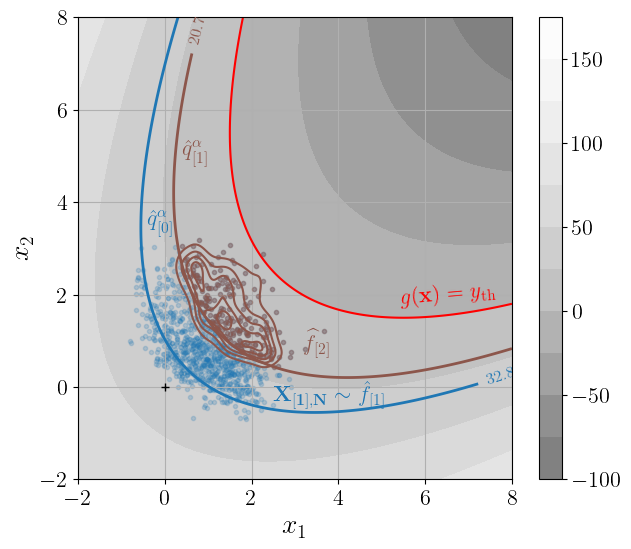

In [8]:
d = DrawFunctions()
d.set_bounds([-4.] * 2, [8.] * 2)
d.draw_2D_controur(title="", function=g, distribution=None, colorbar=faded_greys, contour_values=False)

c = ['C0', 'C5']
i = 1
ssample = df[(df["Subset"]==i) & (df["Y"] <= quantiles[i])]
ssample_full = df[(df["Subset"]==i)]
sslabel = "Subset {} ($q_{{p_0}}^{} = {:.3}$)".format(i, i, quantiles[i])
# Scatters
plt.scatter(ssample_full["X0"].values, ssample_full["X1"].values, color=c[0], marker='.', alpha=0.2)
plt.scatter(ssample["X0"].values, ssample["X1"].values, color=c[1], marker='.', alpha=0.4, zorder=3)
# Quantiles contours
for idx in range(i+1): 
    contour = plt.contour(d.X0, d.X1, d.Z, levels=[quantiles[idx]], colors=c[idx], linewidths=2, linestyles=['solid'])
    plt.clabel(contour, inline=True, fontsize=12, colors=c[idx])
contour = plt.contour(d.X0, d.X1, d.Z, levels=[threshold], colors='red')
# Conditional distribution contours
d.set_bounds([0] * 2, [4] * 2)
Xcond = bancs.conditional_distributions[i+1]
Zpdf = np.array(Xcond.computePDF(d.nodes)).reshape(d.grid_size, d.grid_size)
plt.contour(d.X0, d.X1, Zpdf, 5, corner_mask=False, colors=c[1], zorder=3)
plt.plot(0, 0, marker='+', color='k')
# Texts
plt.text(2.5, -0.3, "$\\mathbf{X_{[1], N}} \sim \\hat{f}_{[1]}$", fontsize=16, color=c[0])
#plt.text(3.2, 0.8, "$\\mathbf{A}_{[2], n} \\subset \\mathbf{X_{[1], N}}$", fontsize=16, color=c[1])
plt.text(3.2, 0.8, "$\\widehat{f}_{[2]}$", fontsize=16, color=c[1])
plt.text(5.4, 1.8, "$g(\\mathbf{x}) = y_{\mathrm{th}}$", fontsize=16, color='red', rotation=5)
plt.text(-0.4, 3.5, "$\\hat{q}_{[0]}^\\alpha$", fontsize=16, color=c[0])
plt.text(0.4, 5, "$\\hat{q}_{[1]}^\\alpha$", fontsize=16, color=c[1])
# Options2.2
plt.xticks(range(-2, 10, 2))
plt.yticks(range(-4, 10, 2))
plt.xlim(-2, 8)
plt.ylim(-2, 8)
plt.grid()
plt.savefig("figures/bancs_illustration1.jpg", bbox_inches='tight', dpi=300);

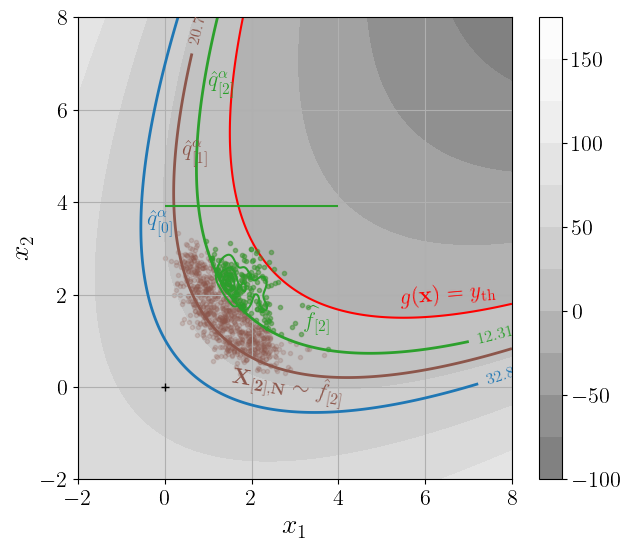

In [9]:
d = DrawFunctions()
d.set_bounds([-4.] * 2, [8.] * 2)
d.draw_2D_controur(title="", function=g, distribution=None, colorbar=faded_greys, contour_values=False)

c = ['C0', 'C5', 'C2', 'C3', 'C4']
i = 2
ssample = df[(df["Subset"]==i) & (df["Y"] <= quantiles[i])]
ssample_full = df[(df["Subset"]==i)]
sslabel = "Subset {} ($q_{{p_0}}^{} = {:.3}$)".format(i, i, quantiles[i])
# Scatters
plt.scatter(ssample_full["X0"].values, ssample_full["X1"].values, color=c[1], marker='.', alpha=0.2)
plt.scatter(ssample["X0"].values, ssample["X1"].values, color=c[2], marker='.', alpha=0.4, zorder=3)
# Quantiles contours
for idx in range(i+1): 
    contour = plt.contour(d.X0, d.X1, d.Z, levels=[quantiles[idx]], colors=c[idx], linewidths=2, linestyles=['solid'])
    plt.clabel(contour, inline=True, fontsize=12, colors=c[idx])
contour = plt.contour(d.X0, d.X1, d.Z, levels=[threshold], colors='red')
# Conditional distribution contours
d.set_bounds([0] * 2, [4] * 2)
Xcond = bancs.conditional_distributions[i+1]
Zpdf = np.array(Xcond.computePDF(d.nodes)).reshape(d.grid_size, d.grid_size)
plt.contour(d.X0, d.X1, Zpdf, 4, corner_mask=False, colors=c[2], zorder=2)
plt.plot(0, 0, marker='+', color='k')
# Texts
plt.text(1.5, -0.3, "$\\mathbf{X_{[2], N}} \sim \\hat{f}_{[2]}$", fontsize=16, color=c[1], rotation=-10)
plt.text(3.2, 1.3, "$\\widehat{f}_{[2]}$", fontsize=16, color=c[2])
plt.text(5.4, 1.8, "$g(\\mathbf{x}) = y_{\mathrm{th}}$", fontsize=16, color='red', rotation=5)
plt.text(-0.4, 3.5, "$\\hat{q}_{[0]}^\\alpha$", fontsize=16, color=c[0])
plt.text(0.4, 5, "$\\hat{q}_{[1]}^\\alpha$", fontsize=16, color=c[1])
plt.text(1., 6.5, "$\\hat{q}_{[2]}^\\alpha$", fontsize=16, color=c[2])
# Options2.2
plt.xticks(range(-2, 10, 2))
plt.yticks(range(-4, 10, 2))
plt.xlim(-2, 8)
plt.ylim(-2, 8)
plt.grid()
plt.savefig("figures/bancs_illustration2.jpg", bbox_inches='tight', dpi=300);